<a href="https://colab.research.google.com/github/Manchal09/mainflow-tasks/blob/main/MainFlowTask7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Dimensionality Reduction**

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 6 features
X, _ = make_classification(n_samples=150, n_features=6, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 7)])

# Save to CSV
df.to_csv('synthetic_dataset.csv', index=False)

# Display the first few rows
print("Synthetic Dataset Created:")
print(df.head())

Synthetic Dataset Created:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0  -0.445294  -0.269407   1.200321  -1.265893   0.122989   0.717542
1   0.285139   0.500917  -0.787537   0.162156  -0.517104  -0.977555
2  -0.044604   0.337603   0.119144  -0.164098  -0.012893  -0.411877
3  -0.233713   2.060748   0.616375  -1.130853  -0.250769   1.755341
4   0.332196   0.077368  -0.879097   1.504850   0.287132  -0.861284


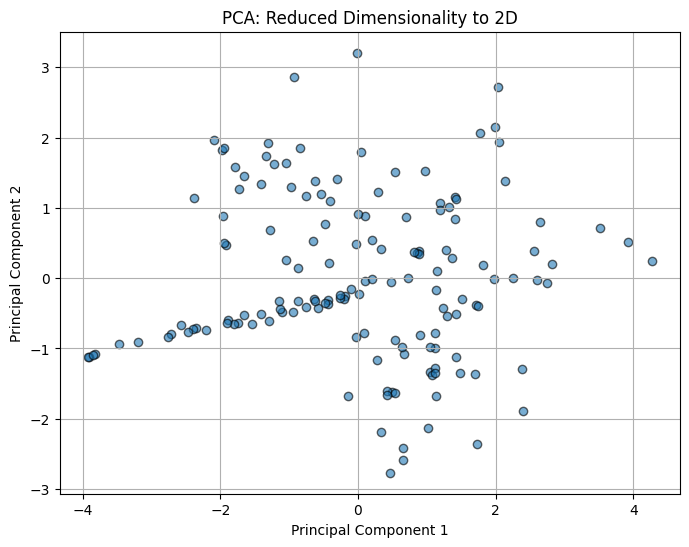

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('synthetic_dataset.csv')

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Dimensionality to 2D')
plt.grid()
plt.show()

**Part 2: Stock Price Prediction Using Time Series
Forecasting**

In [5]:
import pandas as pd
import numpy as np

# Generate dates
date_range = pd.date_range(start="2023-01-01", periods=100, freq='D')

# Generate synthetic stock data
np.random.seed(42)
open_prices = np.random.uniform(low=100, high=500, size=(100,))
close_prices = open_prices + np.random.uniform(low=-10, high=10, size=(100,))
volume = np.random.randint(low=1000, high=10000, size=(100,))

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Open': open_prices,
    'Close': close_prices,
    'Volume': volume
})

# Save as CSV
df.to_csv("stock_prices.csv", index=False)

print("Dataset created and saved as stock_prices.csv")


Dataset created and saved as stock_prices.csv


In [6]:
from google.colab import files
files.download("stock_prices.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                  Open       Close  Volume
Date                                      
2023-01-01  249.816048  240.444631    2648
2023-01-02  480.285723  483.013931    6539
2023-01-03  392.797577  389.084696    5199
2023-01-04  339.463394  339.634808    9445
2023-01-05  162.407456  170.558786    3557
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-01-01 to 2023-04-10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   Close   100 non-null    float64
 2   Volume  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB
Dataset Information:
None


<ipython-input-13-6728100d6214>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


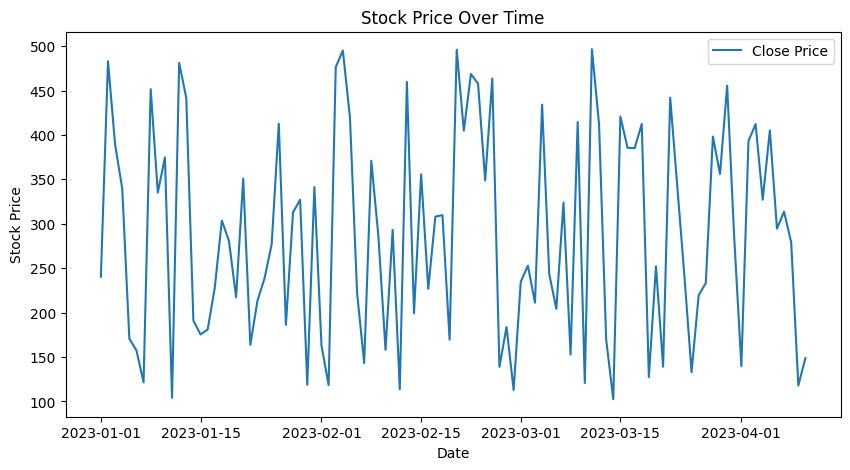

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


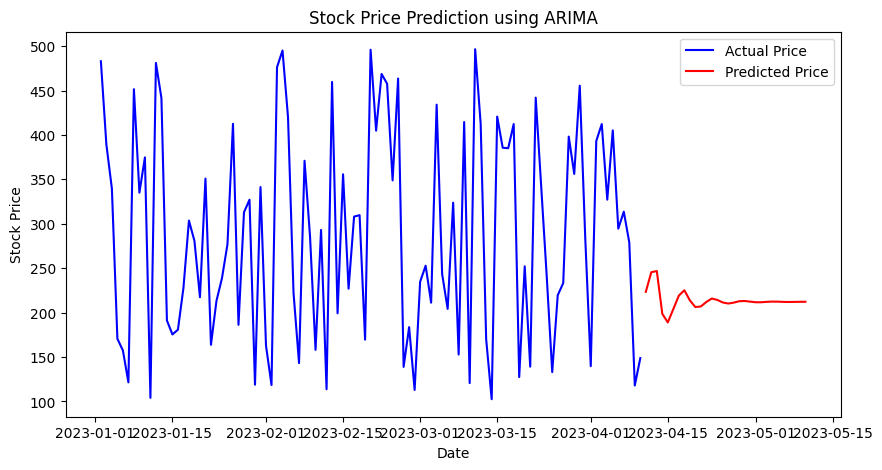

MAE: 124.06773481095419
RMSE: 141.2365027698072


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("stock_prices.csv")

# Convert 'Date' column to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index (important for time series analysis)
df.set_index('Date', inplace=True)

# Display first few rows
print(df.head())

# Display dataset information
dataset_info = df.info()
print("Dataset Information:")
print(dataset_info)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Plot Close price time series
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

# Feature Engineering: Create lag features (if needed)
df['Close_Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)

# Train ARIMA model
model = ARIMA(df['Close'], order=(5, 1, 0))  # Adjust p, d, q parameters as needed
model_fit = model.fit()

# Forecast stock prices
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast vs actual prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Actual Price', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

# Model Evaluation
mae = mean_absolute_error(df['Close'].iloc[-forecast_steps:], forecast[:forecast_steps])
# The 'squared' argument was removed. Use sqrt function to get RMSE if needed
rmse = mean_squared_error(df['Close'].iloc[-forecast_steps:], forecast[:forecast_steps]) ** 0.5
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
